# Working on 'Car Prices' dataset to predict car prices with Linear Regression Model

## Problem Statement

This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

* 1) Predict price of a mercedez benz that is 4 yr old with mileage 45000
* 2) Predict price of a BMW X5 that is 7 yr old with mileage 86000
* 3) Tell the score (accuracy) of your model. 

In [ ]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the file

data = pd.read_csv('carprices.csv')
data

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


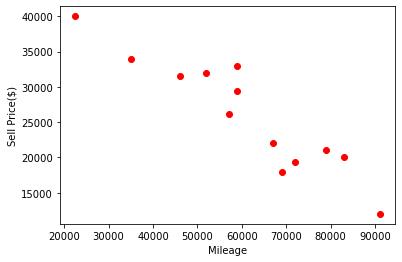

In [22]:
#scatter plot to verify the model to utilize

plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.scatter(data['Mileage'], data['Sell Price($)'], color = 'red')

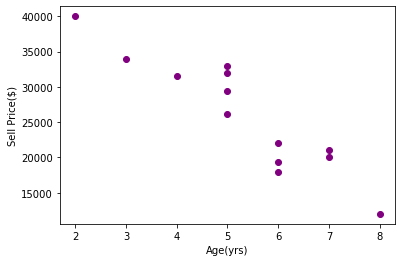

In [23]:
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.scatter(data['Age(yrs)'], data['Sell Price($)'], color = 'purple')

In [4]:
# Using panda dummies to encode the categorical variables

dummies = pd.get_dummies(data['Car Model'])
dummies


,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [5]:
#concatenating the dummies to the data columns

merged = pd.concat([data, dummies], axis = 'columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [7]:
#dropping the categorical column

merged = merged.drop(['Car Model'], axis = 'columns')
merged

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [8]:
#dropping one dummy column because they are multi-colinear

merged = merged.drop(['BMW X5'], axis = 'columns')
merged

,Mileage,Sell Price($),Age(yrs),Audi A5,Mercedez Benz C class
0,69000,18000,6,0,0
1,35000,34000,3,0,0
2,57000,26100,5,0,0
3,22500,40000,2,0,0
4,46000,31500,4,0,0
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,1


In [11]:
# defining the x-axis

x = merged.drop(['Sell Price($)'], axis = 'columns')
x

,Mileage,Age(yrs),Audi A5,Mercedez Benz C class
0,69000,6,0,0
1,35000,3,0,0
2,57000,5,0,0
3,22500,2,0,0
4,46000,4,0,0
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,1


In [13]:
#defining the y-axis

y = merged['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [16]:
# creating linear object

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg

LinearRegression()

In [17]:
#training the model

reg.fit(x,y)

LinearRegression()

### Tell the score (accuracy) of your model.

In [18]:
#checking the accuracy score

reg.score(x,y)

0.9417050937281082

### Predict price of a mercedez benz that is 4 yr old with mileage 45000

In [20]:
reg.predict([[45000,4,0,0]])

C:\Users\AKWARA\Downloads\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([30253.10988464])

### Predict price of a BMW X5 that is 7 yr old with mileage 86000

In [21]:
reg.predict([[86000,7,1,0]])

C:\Users\AKWARA\Downloads\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15365.40972107])